正在绘制 f 轨道 (l=3, m=0)... 这是一个类似哑铃穿过两个甜甜圈的形状


C:\Users\sudac\AppData\Local\Temp\ipykernel_5720\833156923.py:19: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y = sph_harm(m, l, phi, theta)


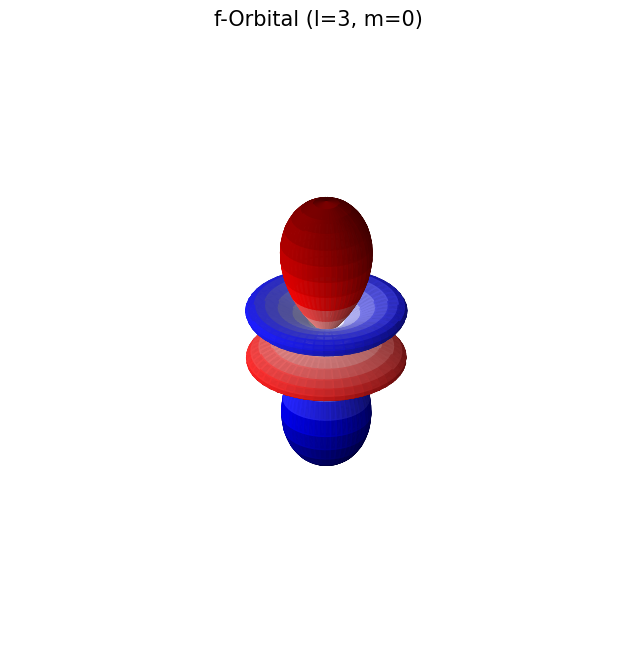

正在绘制 f 轨道 (l=3, m=2)... 这是一个典型的'八叶花'形状


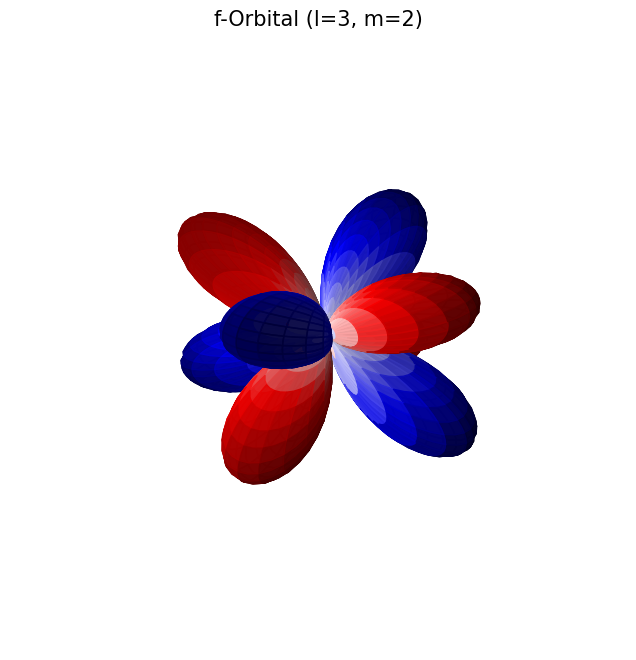

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import sph_harm

def plot_orbital(l, m):
    """
    绘制原子轨道的角度分布形状 (球谐函数)。
    l: 角量子数 (0=s, 1=p, 2=d, 3=f)
    m: 磁量子数 (范围 -l 到 +l)
    """
    # 1. 创建网格 (theta, phi)
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2*np.pi, 100)
    theta, phi = np.meshgrid(theta, phi)

    # 2. 计算球谐函数 Y(l, m)
    # scipy 的 sph_harm 输入顺序是 (m, l, phi, theta)
    Y = sph_harm(m, l, phi, theta)

    # 3. 取模的平方作为半径 r (概率密度)
    # 有时为了展示正负相位，会直接用实部，这里我们画形状，取绝对值
    r = np.abs(Y.real) 

    # 4. 转换回直角坐标系 (x, y, z) 以便绘图
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    # 5. 绘图
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 这里的颜色映射使用了相位信息
    colors = cm.seismic((Y.real - Y.real.min()) / (Y.real.max() - Y.real.min()))
    
    ax.plot_surface(x, y, z, facecolors=colors, rstride=2, cstride=2, alpha=0.9)
    
    # 设置外观
    orbitals = {0:'s', 1:'p', 2:'d', 3:'f', 4:'g'}
    title = f"{orbitals.get(l, 'Unknown')}-Orbital (l={l}, m={m})"
    ax.set_title(title, fontsize=15)
    
    # 调整视角和坐标轴
    limit = np.max(r)
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    ax.axis('off') # 隐藏坐标轴让图更好看
    plt.show()

# --- 这里是可以修改的部分 ---

# 试试看 f 轨道！ (l=3)
# m 的取值可以是 -3, -2, -1, 0, 1, 2, 3
print("正在绘制 f 轨道 (l=3, m=0)... 这是一个类似哑铃穿过两个甜甜圈的形状")
plot_orbital(l=3, m=0)

print("正在绘制 f 轨道 (l=3, m=2)... 这是一个典型的'八叶花'形状")
plot_orbital(l=3, m=2)